In [1]:
import signatory
import matplotlib.pyplot as plt
import matplotlib
from insertion import invert_signature
import torch
import numpy as np
import math

## Semi-circle 

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


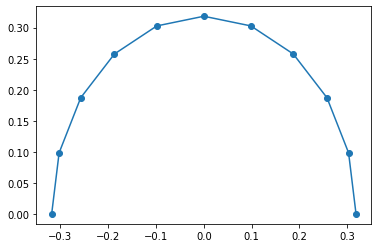

In [2]:
# Create a path

points = np.arange(0,1.1,0.1)

print(points)
x1 = 1/(math.pi)*np.cos(math.pi*points)

x2 = 1/(math.pi)*np.sin(math.pi*points)

plt.plot(x1,x2,linestyle='-',marker='o')
plt.show()

/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/insertion.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_new_tensor=torch.tensor(x).view(new_shape)
/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/insertion.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reconstructed_path_derivatives[p-1,:] = torch.tensor(x_optimal)


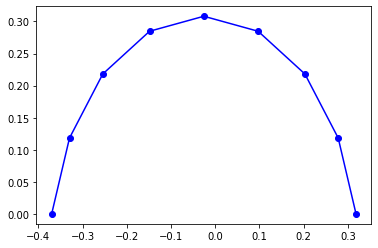

In [3]:
path = torch.tensor(np.array((x1,x2)).T)
n=8

signature = signatory.signature(path.unsqueeze(0), n)

reconstructed_path=invert_signature(signature,n,2,first_point=path[0,:])
plt.plot(reconstructed_path[:,0],reconstructed_path[:,1],c='blue',marker='o')
plt.show()



##  Spiral

/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/sig_invert_env/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


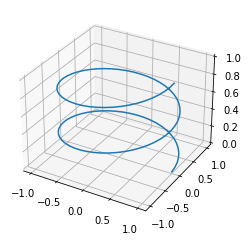

In [4]:
from mpl_toolkits.mplot3d import Axes3D

time=np.linspace(0,1,num=100)

path=torch.tensor(np.transpose(np.array([np.cos(4*math.pi*time),np.sin(4*math.pi*time),time])))


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(path[:,0],path[:,1],path[:,2],linestyle='-')
plt.show()

torch.Size([1, 7174452])


/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/insertion.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_new_tensor=torch.tensor(x).view(new_shape)
/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/insertion.py:211: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reconstructed_path_derivatives[p-1,:] = torch.tensor(x_optimal)
/Users/fermanian/Documents/Thèse/Linus/Signature-inversion/sig_invert_env/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

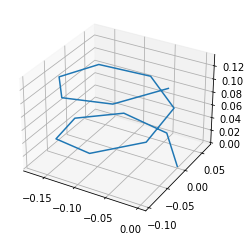

In [7]:
n=13

signature = signatory.signature(path.unsqueeze(0), n+1)
print(signature.shape)

reconstructed_path=invert_signature(signature,n,3)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(reconstructed_path[:,0],reconstructed_path[:,1],reconstructed_path[:,2],linestyle='-')
plt.show()